<center>
<h1 style="color:red; font-size:70px;"> Reproducing CDP paper graphs </h1>

The goal of this notebook is to exactly reproduce some of CDP paper's graphs. In particular the figure I'm referring to is Figure 11, concerning snow depth, mean temperature and total precipitation variations along the whole investigated period.

In [59]:
import numpy as np
import scipy as sp
import xarray as xr
import matplotlib.pyplot as plt

<h1 style="color:blue; font-size:50px;"> Snow height - Mean Temperature - Precipitation </h1>

In [60]:
dat = xr.open_dataset("MetSnowDaily.nc")
prec = dat["total_precipitation"]
sh = dat["snow_depth_auto"]
tmin = dat["Tmin"]
tmax = dat["Tmax"]

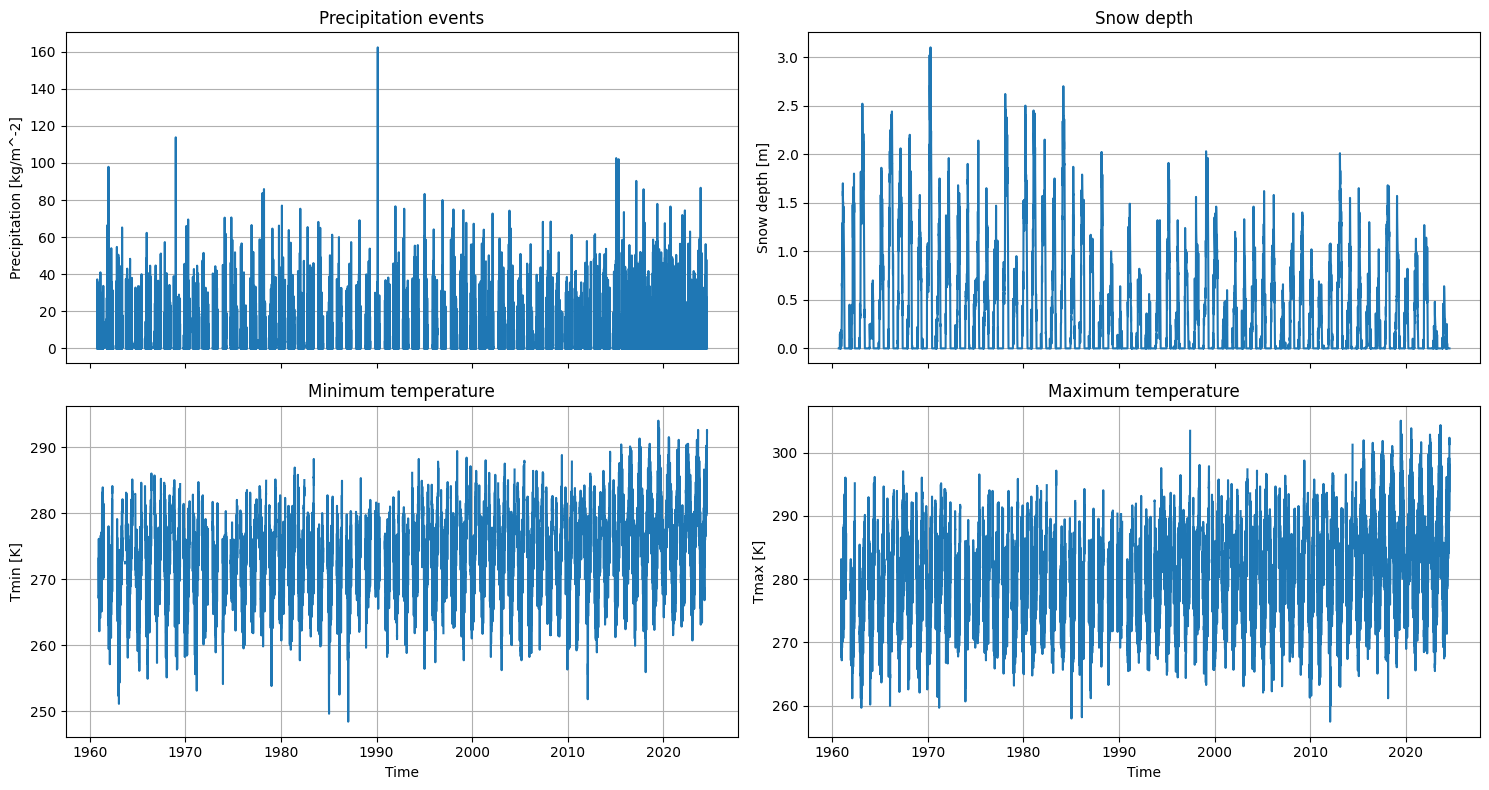

In [61]:
fig, axs = plt.subplots(2, 2, figsize=(15, 8), sharex=True)

# Precipitation
prec.plot(ax=axs[0, 0])
axs[0, 0].set_title("Precipitation events")
axs[0, 0].set_ylabel("Precipitation [kg/m^-2]")
axs[0, 0].set_xlabel("")
axs[0, 0].grid(True, axis="y") 

# Snow depth
sh.plot(ax=axs[0, 1])
axs[0, 1].set_title("Snow depth")
axs[0, 1].set_ylabel("Snow depth [m]")
axs[0, 1].set_xlabel("")
axs[0, 1].grid(True, axis="y") 

# Minimum temperature
tmin.plot(ax=axs[1, 0])
axs[1, 0].set_title("Minimum temperature")
axs[1, 0].set_ylabel("Tmin [K]")
axs[1, 0].set_xlabel("Time")
axs[1, 0].grid(True)

# Maximum temperature
tmax.plot(ax=axs[1, 1])
axs[1, 1].set_title("Maximum temperature")
axs[1, 1].set_ylabel("Tmax [K]")
axs[1, 1].set_xlabel("Time")
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

We can already observe how maximum and minimum temperatures are showing positive upward trends. We will now focus only on the period that ranges from 1 December to 30 April, in order to avoid total precipitation measurament's bias.

In [62]:
# "Winter" snow depth
shW = np.zeros(64)
shWMA = np.zeros(50)
anni = np.arange(1960, 2024, 1)
mesi = np.array(["12", "01", "02", "03", "04"])

for j, year in enumerate(anni):
    sh_list = [] 
    for i, month in enumerate(mesi):
        
        if i != 0:
            yappo = year + 1
        else:
            yappo = year
             
        # Storing monthly values of a single season
        nome = str(yappo) + "-" + month
        sh_list.append(sh.sel(time=nome))

    # Computing snow depth (as a mean of the whole period)
    shappo = xr.concat(sh_list, dim="time")
    appo = shappo.mean()

    if np.isnan(appo):
        appo = 0.0
    else:
        appo = appo.item()
    
    shW[j] = appo

for i in range(0, len(shWMA)):
    shWMA[i] = np.mean(shW[i:i+15])

In [63]:
# "Winter" temperature anomaly
atW = np.zeros(64)
atWMA = np.zeros(50)
anni = np.arange(1960, 2024, 1)
mesi = np.array(["12", "01", "02", "03", "04"])

for j, year in enumerate(anni):
    t_list = [] 
    for i, month in enumerate(mesi):
        
        if i != 0:
            yappo = year + 1
        else:
            yappo = year
             
        nome = str(yappo) + "-" + month
        meanT = (tmin.sel(time=nome) + tmax.sel(time=nome))/2
        t_list.append(meanT)

    tappo = xr.concat(t_list, dim="time")
    appo = tappo.mean()

    if np.isnan(appo):
        appo = 0.0
    else:
        appo = appo.item()
    
    atW[j] = appo

baseT = np.mean(atW[0:30])
atW = atW - baseT

for i in range(0, len(atWMA)):
    atWMA[i] = np.mean(atW[i:i+15])

In [64]:
# "Winter" precipitation computation
precW = np.zeros(64)
precWMA = np.zeros(50)
anni = np.arange(1960, 2024, 1)
mesi = np.array(["12", "01", "02", "03", "04"])

for j, year in enumerate(anni):
    for i, month in enumerate(mesi):
        
        if i != 0:
            yappo = year + 1
        else:
            yappo = year
             
        # Computing precipitation
        nome = str(yappo) + "-" + month
        prec_month = prec.sel(time=nome).sum()
        if np.isnan(prec_month):
            prec_month = 0.0
        else:
            prec_month = prec_month.item()
    
        precW[j] += prec_month 

for i in range(0, len(precWMA)):
    precWMA[i] = np.mean(precW[i:i+15])

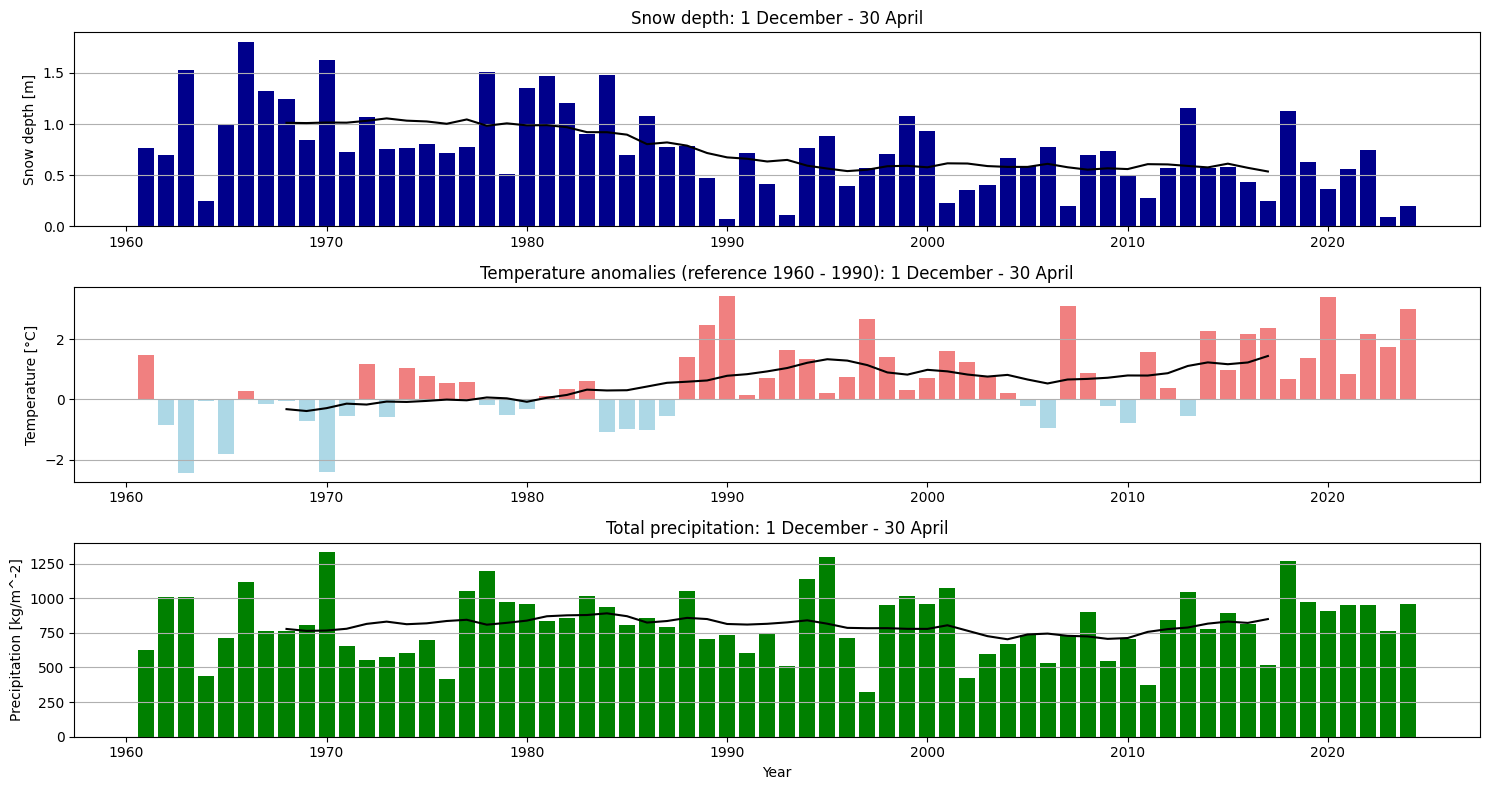

In [65]:
hydroY = np.arange(1961, 2025, 1)
fig, axs = plt.subplots(3, 1, figsize=(15, 8))
colors = ["lightcoral" if val > 0 else "lightblue" for val in atW]


# "Winter" snow depth
axs[0].bar(hydroY, shW, width=0.8, color="darkblue")
axs[0].plot(np.arange(1968, 2018, 1), shWMA, color="black")
axs[0].set_title("Snow depth: 1 December - 30 April")
axs[0].set_ylabel("Snow depth [m]")
axs[0].grid(True, axis="y") 

# "Winter" temperature anomalies
axs[1].bar(hydroY, atW, width=0.8, color=colors)
axs[1].plot(np.arange(1968, 2018, 1), atWMA, color="black")
axs[1].set_title("Temperature anomalies (reference 1960 - 1990): 1 December - 30 April")
axs[1].set_ylabel("Temperature [°C]")
axs[1].grid(True, axis="y") 


# "Winter" total precipitation
axs[2].bar(hydroY, precW, width=0.8, color="green")
axs[2].plot(np.arange(1968, 2018, 1), precWMA, color="black")
axs[2].set_title("Total precipitation: 1 December - 30 April")
axs[2].set_ylabel("Precipitation [kg/m^-2]")
axs[2].set_xlabel("Year")
axs[2].grid(True, axis="y") 


plt.tight_layout()
plt.show()